# Inspect model performance on test data

In [1]:
import dataclasses

import numpy as np
import matplotlib.pyplot as plt
import torch

import trajectory
import run

In [2]:
# Directory where model is loaded from
RUN_DIRPATH = 'models/20220426_02'

# Number of trajectories to sample
N_TRIALS = 500

## Load model

In [3]:
run_params, model = run.load_run(RUN_DIRPATH)
run_params.print()

trajectory:
    rng_seed: 1993
    n_steps: 450
    boundary_shape: square
    boundary_height: 2.0
    time_step: 0.1
    std_norm: 0.5
    mean_speed: 0.2
    coordinates: cartesian
model:
    n_units: 100
    rnn_bias: True
    output_bias: False
trainer:
    n_batches: 5000
    batch_size: 500
    learning_rate: 0.0001
    weight_decay: 0.0001


## Simulate trajectories

In [4]:
# Use trajectory generator with different random seed for test data
traj_params = dataclasses.replace(run_params.traj)
traj_params.rng_seed = run_params.traj.rng_seed + 1

# Sample batch
tgen = trajectory.TrajectoryGenerator(traj_params)
vel, pos = tgen.smp_batch(N_TRIALS)

## Run model on all trials

In [5]:
# Convert velocity array to Tensor in order to run model
vel_t = torch.Tensor(vel)

# Predict estimated position
pos_est_t, u_vals_t = model(vel_t)

# Convert estimated position back to Numpy array
pos_est = pos_est_t.detach().numpy()
u_vals = u_vals_t.detach().numpy()

## Plot results

In [6]:
boundary = trajectory.SquareBoundary(run_params.traj.boundary_height)

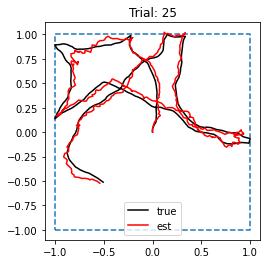

In [8]:
trial_plt = 25
t_start = 0
t_stop = 450

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
trajectory.plot_position_estimate(boundary, pos_plt, pos_est_plt, ax)